# Fussing About with Tara

In [47]:
# imports
import os

import numpy as np
#from seaborn import sns
from matplotlib import pyplot as plt

import pandas

# Load one

In [3]:
tara_path = '/home/xavier/Projects/Oceanography/Color/data/Tara'

In [4]:
ex_file = os.path.join(tara_path, 'CT-Rio', 'Tara_ACS_apcp2010_286cp.txt')

## Grab the fields

In [12]:
f = open(ex_file)
lines = f.readlines()
f.close()

In [35]:
#
for line in lines:
    if line[0] != '/':
        continue
    # Fields?
    if 'fields' in line:
        fields = line.strip().split('=')[1].split(',')
    # Units
    if 'units' in line:
        units = line.strip().split('=')[1].split(',')
# Ignore the dummy
fields = fields
units = units[:-1]

In [36]:
fields[0:5], fields[-5:]

(['date', 'time', 'lat', 'lon', 'Wt'],
 ['cp745.6', 'cp748.1', 'cp750.8', 'cp753.5', ''])

In [37]:
units[0:5], units[-5:]

(['yyyymmdd', 'hh:mm:ss', 'degrees', 'degrees', 'degreesC'],
 ['1/m', '1/m', '1/m', '1/m', '1/m'])

## pandas time

In [43]:
df = pandas.read_table(ex_file, comment='/', names=fields, delimiter=' ', index_col=False)
df.head()

,date,time,lat,lon,Wt,sal,cp405.5,cp410.1,cp414.4,cp419,...,cp730,cp733.4,cp736.7,cp739.6,cp742.4,cp745.6,cp748.1,cp750.8,cp753.5,
0,20101013,01:08:00,-16.4806,-29.6012,25.0676,37.1607,0.0566,0.0560,0.0562,0.0557,...,0.0344,0.0344,0.0340,0.0340,0.0338,0.0336,0.0337,0.0337,0.0336,NaN
1,20101013,01:09:00,-16.4814,-29.6029,25.0637,37.1588,0.0575,0.0560,0.0561,0.0550,...,0.0344,0.0343,0.0340,0.0341,0.0340,0.0337,0.0336,0.0336,0.0336,NaN
2,20101013,01:10:00,-16.4824,-29.6046,25.0609,37.1594,0.0564,0.0560,0.0553,0.0554,...,0.0344,0.0343,0.0339,0.0340,0.0337,0.0337,0.0336,0.0337,0.0335,NaN
3,20101013,01:11:00,-16.4832,-29.6063,25.0578,37.1574,0.0582,0.0568,0.0573,0.0567,...,0.0352,0.0352,0.0349,0.0348,0.0348,0.0346,0.0344,0.0345,0.0342,NaN
4,20101013,01:12:00,-16.4841,-29.6080,25.0582,37.1586,0.0573,0.0559,0.0560,0.0560,...,0.0349,0.0349,0.0345,0.0345,0.0341,0.0342,0.0338,0.0343,0.0342,NaN


## Uncertainty

# Parse all the spectra

In [53]:
dum = np.zeros((len(df), 1000))
wv_nm = []
ii = 0
for key in df.keys():
    if key[0:2] == 'cp':
        # Wavelength
        wv_nm.append(float(key[2:]))
        # Slurp
        dum[:,ii] = df[key].values
        ii += 1
# Cut down
spec = dum[:, :ii]
# Wavelengths
wv_nm = np.array(wv_nm)

In [54]:
wv_nm

array([405.5, 410.1, 414.4, 419. , 423.7, 428.6, 433.1, 437.7, 442.5,
       447. , 452. , 456.6, 461.1, 465.5, 470.6, 475.7, 480.6, 485.5,
       489.9, 494.4, 499.1, 503.8, 508.5, 513.5, 518.4, 523.2, 527.7,
       532.3, 537.2, 541.5, 545.9, 550.7, 555.3, 559.8, 563.2, 567.6,
       572. , 576.3, 580.5, 584.9, 589.3, 593.9, 598.4, 603. , 607.6,
       612.7, 617.4, 622. , 626.5, 630.9, 635.4, 640. , 644.8, 649.3,
       654.2, 658.6, 663.4, 668.2, 672.6, 676.8, 680.9, 685.5, 689.7,
       693.7, 697.6, 701.7, 705.4, 709.4, 712.8, 716.4, 720. , 723.3,
       726.8, 730. , 733.4, 736.7, 739.6, 742.4, 745.6, 748.1, 750.8,
       753.5])

In [55]:
spec[0:10,ii-1]

array([0.0336, 0.0336, 0.0335, 0.0342, 0.0342, 0.0336, 0.0335, 0.0339,
       0.0336, 0.0331])

----

# Plot a bit

## Histogram of one field

<Axes: >

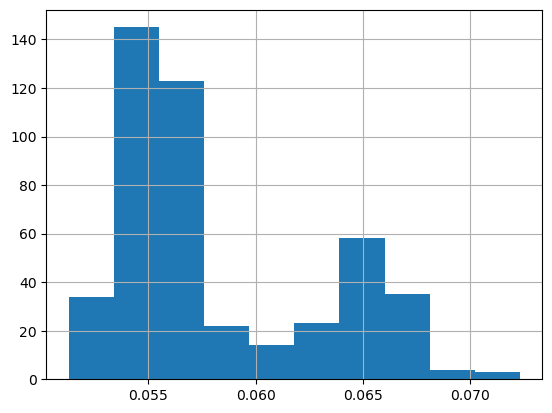

In [44]:
df['cp405.5'].hist()

## Spectrum

In [45]:
df.iloc[0]

date       20101013
time       01:08:00
lat        -16.4806
lon        -29.6012
Wt          25.0676
             ...   
cp745.6      0.0336
cp748.1      0.0337
cp750.8      0.0337
cp753.5      0.0336
                NaN
Name: 0, Length: 89, dtype: object

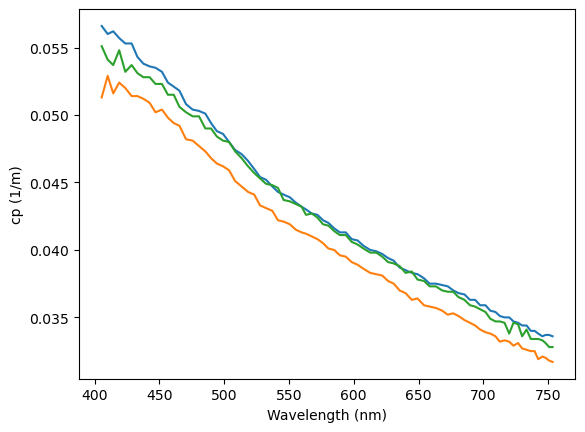

In [61]:
plt.clf()
ax = plt.gca()
for jj in range(3):
    ax.plot(wv_nm, spec[jj*100, :])
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('cp (1/m)')
plt.show()